## **Loan Approval Prediction Model**

### **Problem Statement:**  
Develop a machine learning model to predict **loan approval status** based on applicant features. The model will be trained on a dataset containing loan applications and their outcomes. It will help financial institutions automate and improve the accuracy of loan approval decisions.  

### **Objective:**  
To predict **Loan Approval Status** using a Machine Learning Model.  

### **Benefits:**  
The benefits of this solution include:  
- **Lenders** can make **faster and more accurate loan approval decisions**, reducing manual effort.  
- **Applicants** will get **quicker responses** and **fairer evaluations** based on objective data.  
- **Financial institutions** can **minimize default risks** by identifying high-risk applicants more effectively.  


In [28]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [41]:
# Load the Dataset                                                                                                                   
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Getting shape of dataset
df.shape

(4269, 13)

In [110]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [107]:
# Statistical summary of numerical columns
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [19]:
# Checking for Duplicate values
df.duplicated().sum()

np.int64(0)

In [108]:
# Dropping rows with null values
df.dropna(inplace=True)

In [42]:
#Removing Blank spaces from column names and values

df.columns = df.columns.str.strip()

df['loan_status'] = df['loan_status'].str.strip()  # Remove spaces

df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [44]:
# Data Transformation on Education, Self Employed Coloumns

df['education'] = df['education'].replace({'Not Graduate': 0, 'Graduate': 1})

df['self_employed'] = df['self_employed'].replace({'No': 0, 'Yes': 1})

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [45]:
# Data Transformation on Loan Status Coloumns

df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [46]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Exploratory Data Analysis (EDA)

- Visualize relationships between features.
- Identify trends and patterns.

### 1.Univariate Analysis

It focuses on examining a single variable at a time. It helps in understanding the distribution of the data.

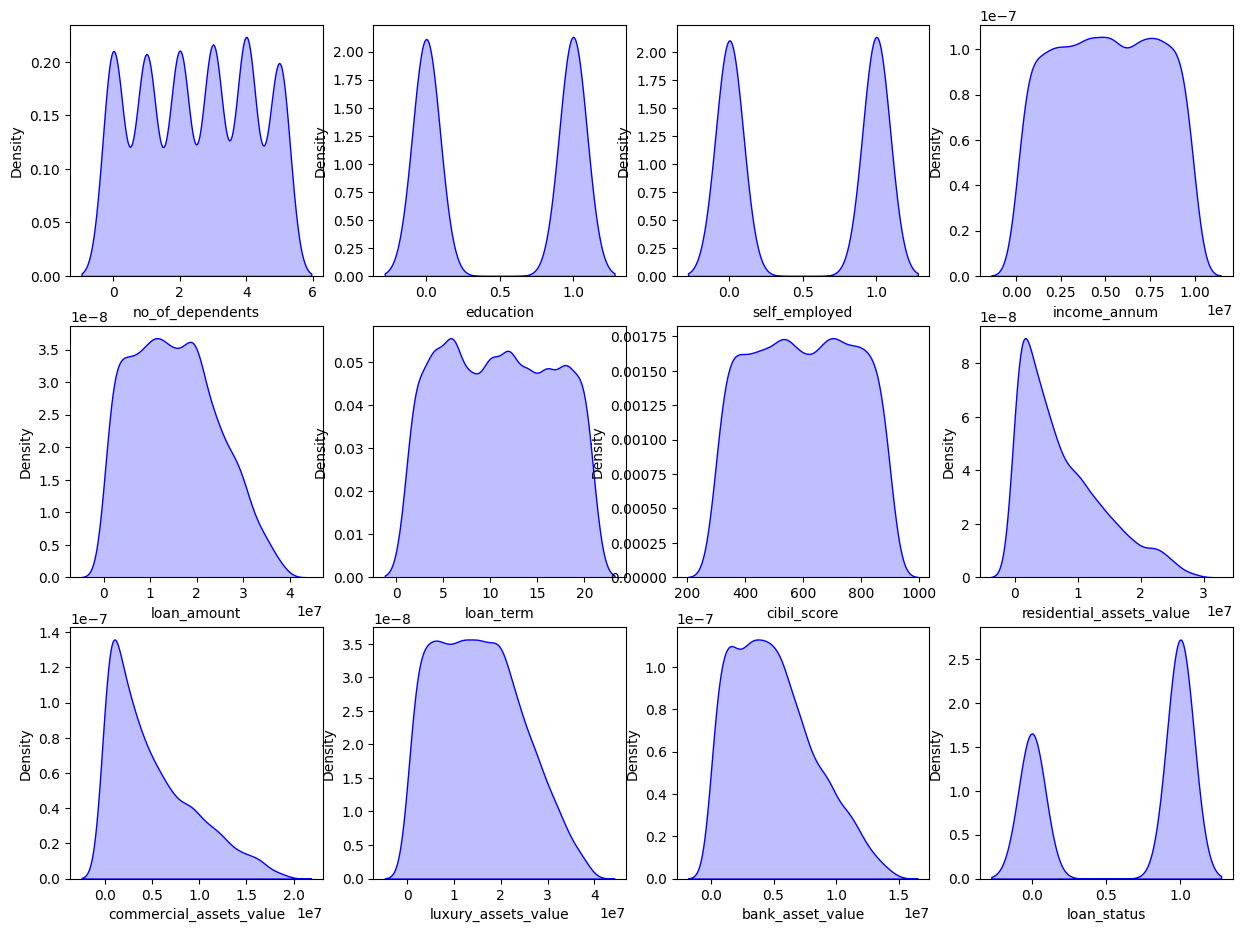

In [132]:
# Univariate analysis
plt.figure(figsize=(15, 15))

numerical_columns = ['no_of_dependents', 'education', 'self_employed', 
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value', 
    'luxury_assets_value', 'bank_asset_value', 'loan_status']

for i in range(len(numerical_columns)):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(x=df[numerical_columns[i]], fill=True, color='b')  # Replaced shade with fill
    plt.xlabel(numerical_columns[i])

plt.show()

In [31]:
print(df.columns)  # List all column names

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


### 2.Bivariate Analysis

It helps in understanding the relationship between two variables, and alows us to know how they are related with each other negatively or postively.

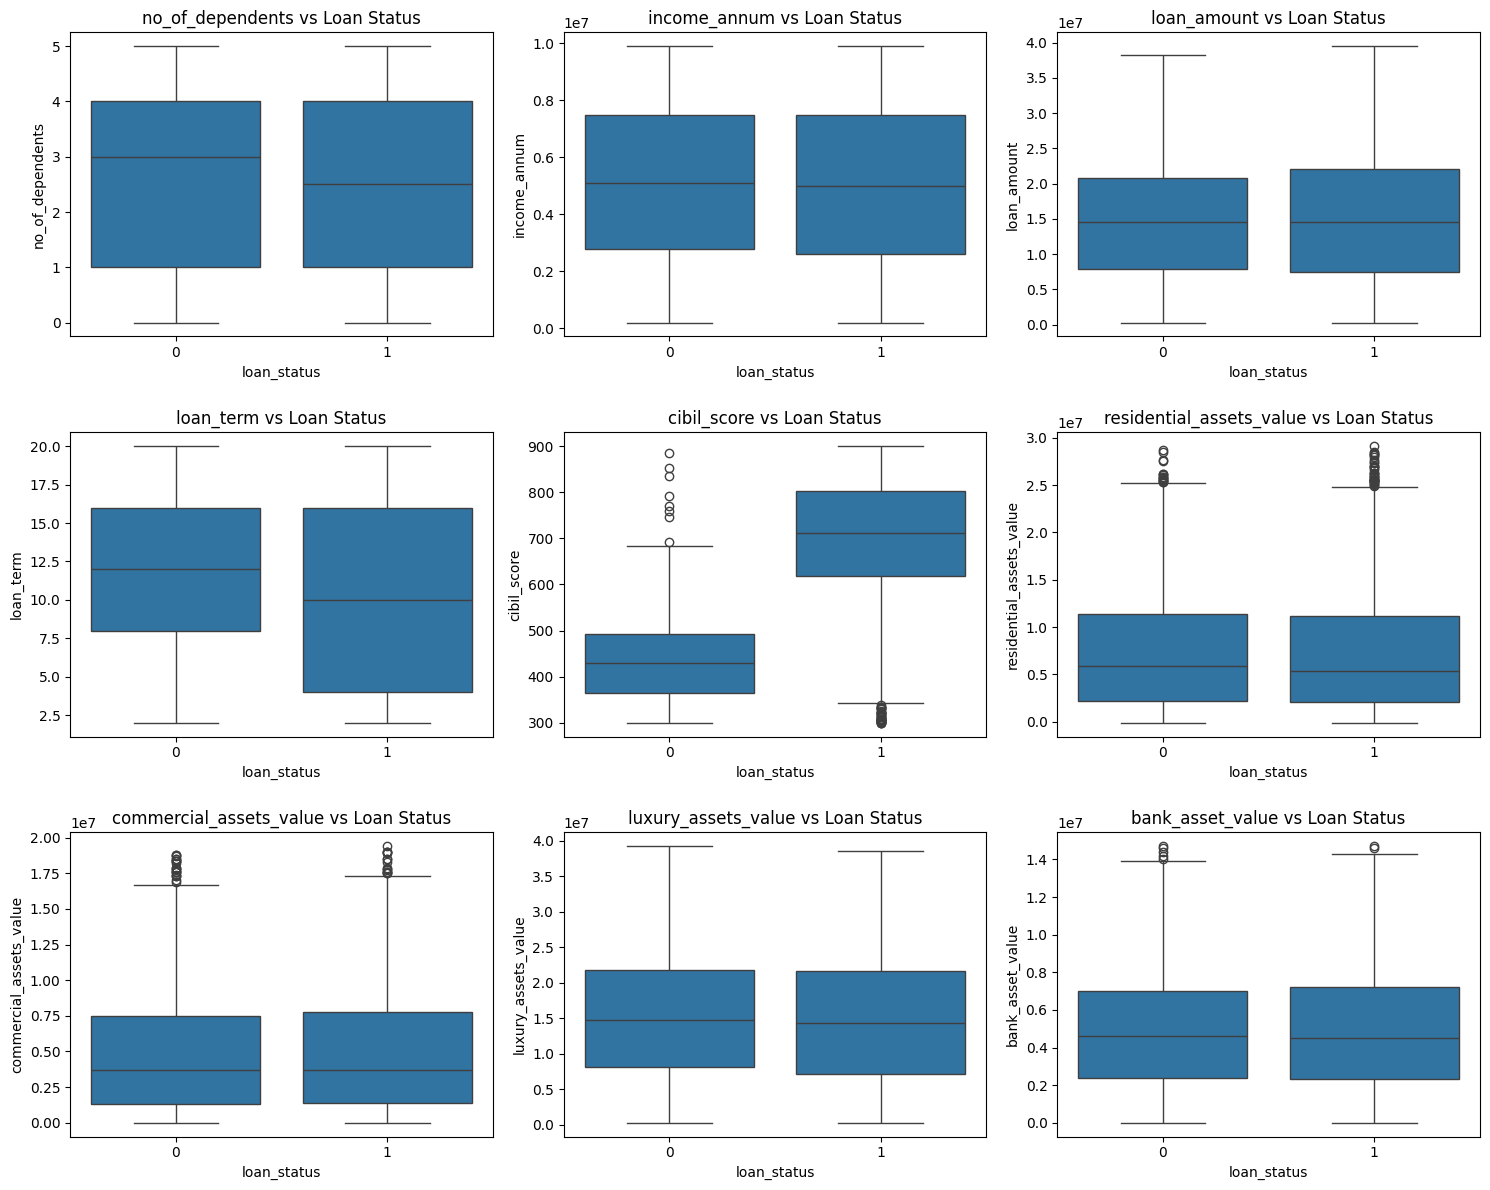

In [133]:
#Bivariate Analysis

numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                     'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                     'luxury_assets_value', 'bank_asset_value']
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title(f"{col} vs Loan Status")

plt.tight_layout()
plt.show()

### 3.Multivariate Analysis (Relation between multiple variables)

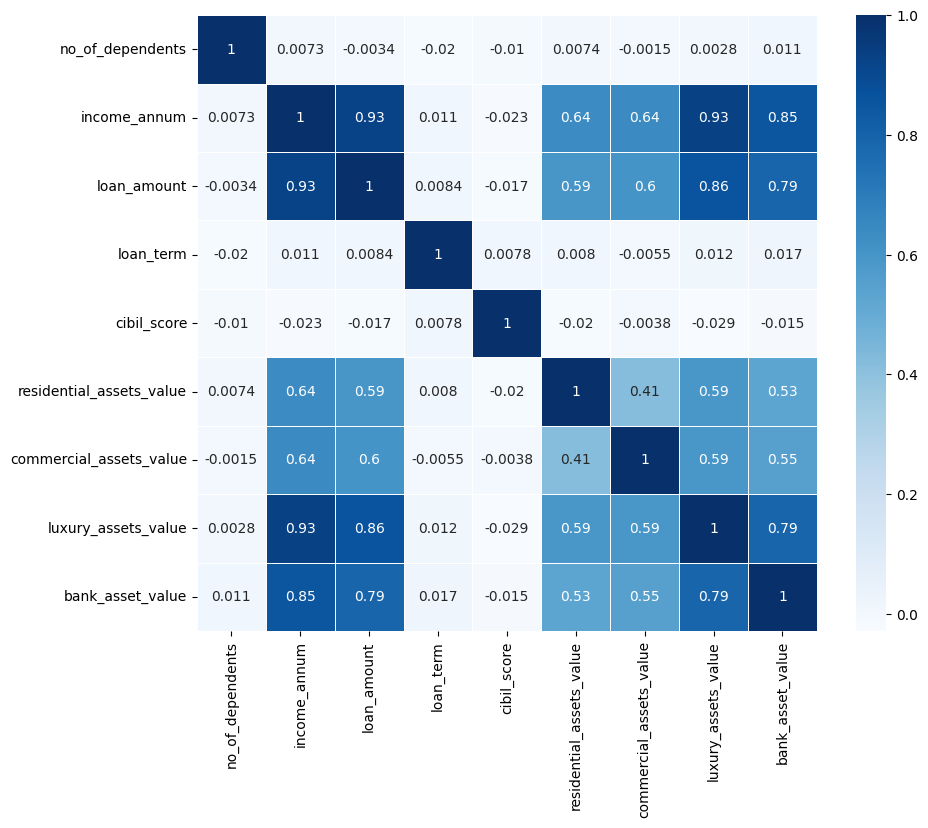

In [57]:
#MultiVariate Analysis

# Plot the heatmap of the correlation between each of the numerical features

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='Blues', linewidths=0.5)

plt.show()

## Model Selection & Training:

In [47]:
#Adding all asset cols into one col.

df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

In [48]:
#Dropping non required columns

df.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace=True)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets
0,1,2,1,0,9600000,29900000,12,778,1,50700000
1,2,0,0,1,4100000,12200000,8,417,0,17000000
2,3,3,1,0,9100000,29700000,20,506,0,57700000
3,4,3,1,0,8200000,30700000,8,467,0,52700000
4,5,5,0,1,9800000,24200000,20,382,0,55000000


In [49]:
# Dropping the unwanted columns(Less Required Cols)
df.drop(columns=['loan_id', 'no_of_dependents', 'education', 'self_employed'], inplace=True)

#Removing Target Variable and creating the feature matrix `x`, which will be used for training the model.
x = df.drop(columns=['loan_status'])

# Creating the Target matrix `y`, which contains target variable
y = df['loan_status']

### **Features (X) and Target (y) in Supervised Learning**  

- **Features (X):** Input variables used to predict the target. Examples:  
  - **CIBIL Score**  
  - **Loan Amount**  
  - **Total Assets**  
  - **Loan Term**  
  - **Income Annum**  

- **Target (y):** The output variable we want to predict, i.e., **Loan Approval Status (Approved/Not Approved)**.  

### **Why Split the Dataset?**  
- **X (Features):** Helps the model learn patterns influencing loan approval.  
- **y (Target):** The value the model aims to predict.  
- Separating features and target allows the model to understand relationships and make accurate predictions.  

### Split data into training and testing sets.

In [14]:
# Divide the dataset into training (80%) and testing (20%) subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Train the Regression Model

In [35]:
# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model using the training dataset
model.fit(x_train, y_train)

# Generate predictions on the test dataset
y_pred = model.predict(x_test)

# Display the first 10 predicted values
print('Predictions',y_pred[:10])

Predictions [0 1 0 1 1 1 1 0 1 0]


In [30]:
#Getting Model Accuracy

print('Accuracy',accuracy_score(y_test,y_pred))

print('Accuracy',classification_report(y_test,y_pred))

Accuracy 0.9063231850117096
Accuracy               precision    recall  f1-score   support

           0       0.88      0.87      0.87       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



# Model Evaluation

#### **Evaluating Model Using**

- **Confusion Matrix**: Displays the true positive, false positive, true negative, and false negative values to assess classification performance.  
- **ROC Curve & AUC (Area Under Curve)**: Shows the trade-off between true positive rate and false positive rate, with AUC values closer to 1 indicating better performance.  
- **Feature Importance (Logistic Regression Coefficients)**: Highlights the most influential features in model predictions, helping in feature selection and interpretability.

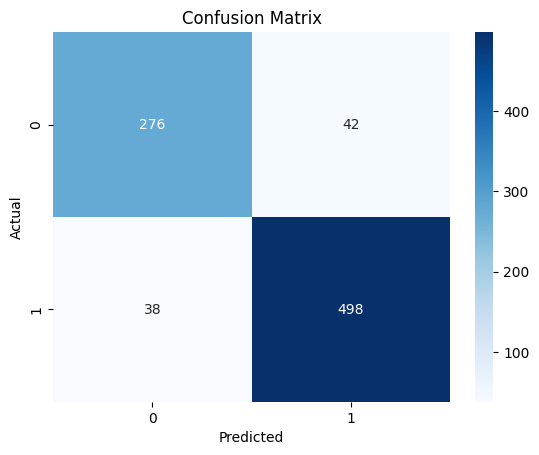

In [24]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

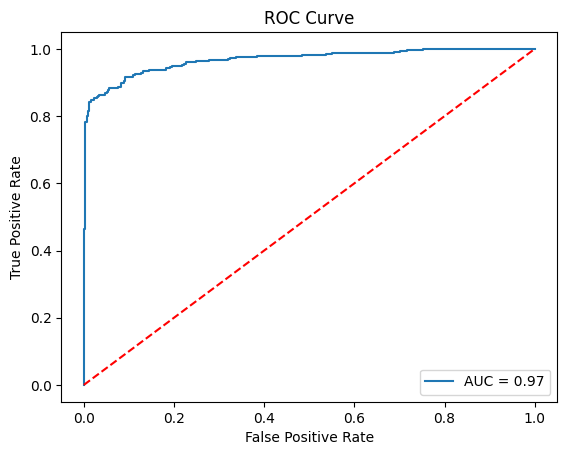

In [25]:
# ROC Curve & AUC (Area Under Curve)

y_pred_prob = model.predict_proba(x_test)[:,1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'r--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

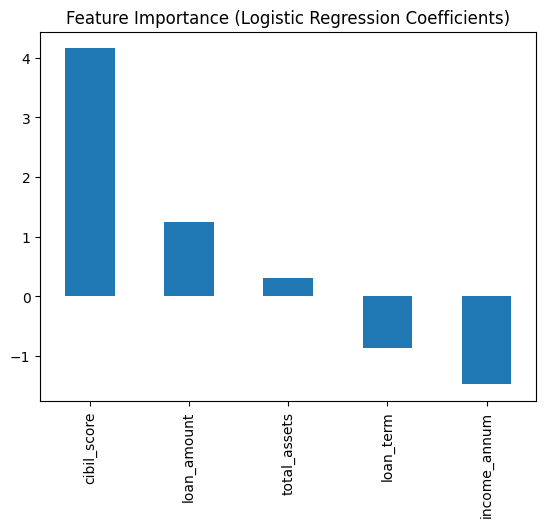

In [27]:
#Feature Importance (Logistic Regression Coefficients)

importance = pd.Series(model.coef_[0], index=x.columns)  # Use original x DataFrame
importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

### **Model Evaluation Result**

#### **Confusion Matrix**
- **True Positives (498)** and **True Negatives (276)** indicate good classification.  
- **False Positives (42)** and **False Negatives (38)** should be analyzed for potential improvements.  

#### **ROC Curve (AUC = 0.97)**
- A high AUC value suggests excellent model performance and strong discriminatory power.  

#### **Feature Importance**
- **CIBIL Score** has the highest impact on predictions.  
- **Loan Amount** also plays a significant role.  
- **Income Annum** negatively influences predictions, indicating an inverse relationship.  
